In [1]:
#install geopandas library
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 46.0 MB/s 
     |████████████████████████████████| 16.7 MB 356 kB/s 


In [2]:
#install mapclassify library
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#import libraries
import geopandas as gpd
import folium
import pandas as pd

In [10]:
pakistan_map = folium.Map(location = [30.37,69.34],zoom_start=4.5,tiles='OpenStreetMap')



#import Google Drive and mount the entire drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#load the dataset (csv file) into the Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Semester6/DroneAttack.csv')
df

,latitude,longitude,date,president_name,City,region,total_low,total_high,size,deaths
0,34.841988,71.497650,30-Oct-06,Bush,"Chenagai, six miles north of Khar",Bajaur,80,82,81.1,81
1,32.622604,69.852448,23-Jun-09,Obama,Makeen,South Waziristan,40,80,60.1,75
2,32.987930,69.763184,17-Mar-11,Obama,"Datta Khel, 15 miles west of Miram Shah",North Waziristan,45,45,45.1,45
3,32.527710,69.863434,8-Jul-09,Obama,Karwan Manza,South Waziristan,17,40,28.6,28
4,32.991386,70.291901,19-Jun-07,Bush,"Mami Rogha, 26 miles west of Miram Shah",North Waziristan,20,34,27.1,27
...,...,...,...,...,...,...,...,...,...,...
409,33.150000,70.433300,4-Jul-18,Trump,Tor Tangai,North Waziristan,1,2,1.6,1
410,32.622604,69.829102,14-Jun-08,Bush,Makeen,South Waziristan,1,1,1.1,1
411,32.905200,69.748800,12-Jul-11,Obama,Neway Adda Village,North Waziristan,1,1,1.1,1
412,32.302800,69.580500,27-Aug-08,Bush,Ganghikhel area,South Waziristan,0,0,0.1,1


In [16]:
t = 0
for c in df['size']:
  t = float(c)+float(t)

In [17]:
for city,lat,long,size in zip(list(df['City']),list(df['latitude']),list(df['longitude']),list(df['size'])):
    folium.CircleMarker(location = [lat,long],
                       radius = (size/t)*100,
                       color = 'red',
                       fill = False,
                       fill_color = 'blue').add_to(pakistan_map)
    xyz = '<strong>State:  ' + city + '</strong><br>' + 'Total Cases: ' + str(size) + '<br>' 
    iframe = folium.IFrame(xyz, width=200, height=150)
    popupData = folium.Popup(iframe, max_width=500)
    folium.Marker(location = [lat,long], popup=popupData).add_to(pakistan_map)
    

pakistan_map

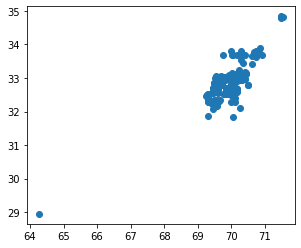

In [7]:





#plot co-ordinates values
# dronesmap = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.longitude, y=df.latitude))
# dronesmap.plot()

In [8]:
#plot co-ordinates values on the map
# displaymap = dronesmap.set_crs(epsg=4326)
# displaymap.crs
# displaymap.explore()